In [2]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

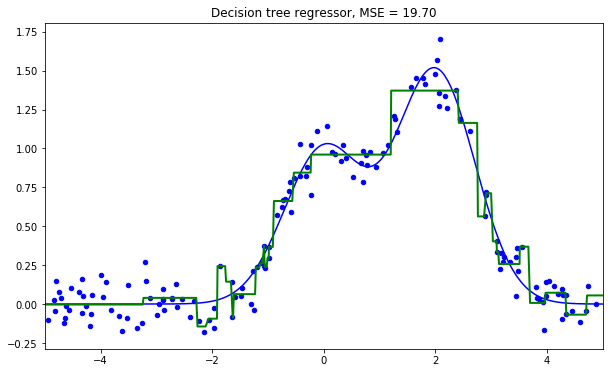

In [10]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [12]:
X_test.ravel()

array([-4.99728051, -4.98830624, -4.98238047, -4.96131081, -4.94697962,
       -4.93680692, -4.92933664, -4.92549923, -4.92098467, -4.90946196,
       -4.8965175 , -4.89004244, -4.87962572, -4.86833839, -4.86566813,
       -4.85267739, -4.84539273, -4.84241524, -4.8400947 , -4.834447  ,
       -4.82321177, -4.82310376, -4.81971533, -4.7880406 , -4.77661836,
       -4.74740857, -4.74637682, -4.74206557, -4.7368092 , -4.73406487,
       -4.73201477, -4.68782295, -4.65553841, -4.65167895, -4.64605942,
       -4.63564069, -4.63542414, -4.63517387, -4.62952098, -4.62947525,
       -4.6018665 , -4.598137  , -4.59673118, -4.59500546, -4.59472514,
       -4.58770625, -4.58567973, -4.58459503, -4.58218521, -4.5720786 ,
       -4.56699848, -4.56375087, -4.5503214 , -4.53795844, -4.53011066,
       -4.51511698, -4.49427212, -4.46065822, -4.45584835, -4.44773598,
       -4.42017522, -4.39140887, -4.38744096, -4.38433745, -4.38044442,
       -4.38004963, -4.37604826, -4.37401371, -4.35864462, -4.34

In [13]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)
    # первый признак пропорционален целевому
    x1 = 0.3 * y
    # остальные признаки – шум
    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

In [19]:
X[0]

array([-0.3       ,  0.50270176,  0.79418025,  0.60875971,  0.1379369 ,
        0.10820962,  0.45470775,  0.00851219,  0.55670333,  0.89625642,
        0.68891531,  0.22027905,  0.18530451,  0.9566184 ,  0.80408976,
        0.93327111,  0.75029085,  0.19491985,  0.00122348,  0.4022403 ,
        0.54475701,  0.56900225,  0.38924096,  0.94272143,  0.2470504 ,
        0.99758363,  0.43839997,  0.74132179,  0.15285393,  0.65158721,
        0.69424191,  0.20903014,  0.75212239,  0.33201445,  0.7350982 ,
        0.41557399,  0.27501189,  0.31848109,  0.26830873,  0.32978282,
        0.79513425,  0.41303297,  0.17669426,  0.69383342,  0.86603449,
        0.93875085,  0.42058708,  0.46882594,  0.72130427,  0.34875733,
        0.38372621,  0.89625768,  0.59664184,  0.75472417,  0.86317555,
        0.24757558,  0.98962178,  0.65815714,  0.57163418,  0.91861395,
        0.47236929,  0.8937314 ,  0.93631231,  0.57229999,  0.60159119,
        0.90079269,  0.96319459,  0.54685357,  0.51939585,  0.28